* Evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its monetary value.
* The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.

## Import important packages and dataset

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv(r'C:\Users\sakshi\OneDrive\Desktop\Python\boston_Housing\HousingData.csv')

In [3]:
data.shape

(506, 14)

In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Feature Engineering

In [5]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
data=data.fillna(data.mean())

In [7]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
corr = data.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


<AxesSubplot:>

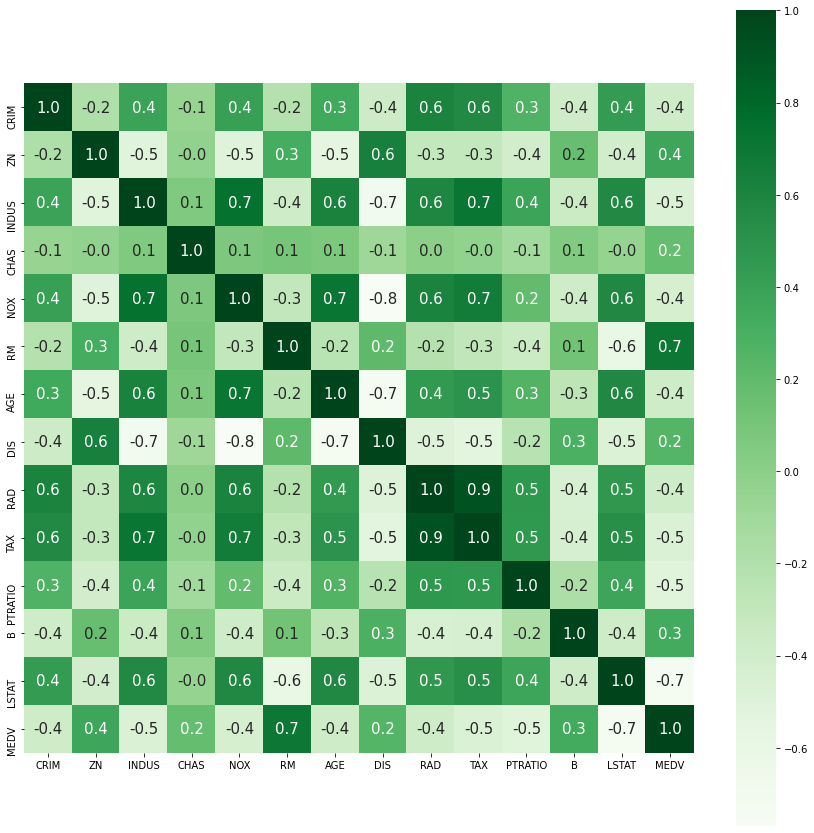

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [10]:
prices=data['MEDV']
features=data.drop('MEDV', axis=1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
Scalar=MinMaxScaler()
col=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
features[col] = Scalar.fit_transform(features[col])

features.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.303130


In [12]:
inputs = torch.tensor(features.values)
targets = torch.tensor(prices.values)

In [13]:
inputs.size()

torch.Size([506, 13])

In [14]:
targets=targets.reshape(506,1)

In [15]:
targets.size()

torch.Size([506, 1])

In [16]:
from torch.utils.data import TensorDataset

In [17]:
inputs=inputs.float()

In [18]:
inputs.dtype

torch.float32

In [19]:
targets=targets.float()

In [20]:
targets.dtype

torch.float32

## Training and testing

In [21]:
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[0.0000e+00, 1.8000e-01, 6.7815e-02, 0.0000e+00, 3.1481e-01, 5.7751e-01,
          6.4161e-01, 2.6920e-01, 0.0000e+00, 2.0802e-01, 2.8723e-01, 1.0000e+00,
          8.9680e-02],
         [2.3592e-04, 0.0000e+00, 2.4230e-01, 0.0000e+00, 1.7284e-01, 5.4800e-01,
          7.8270e-01, 3.4896e-01, 4.3478e-02, 1.0496e-01, 5.5319e-01, 1.0000e+00,
          2.0447e-01],
         [2.3570e-04, 0.0000e+00, 2.4230e-01, 0.0000e+00, 1.7284e-01, 6.9439e-01,
          5.9938e-01, 3.4896e-01, 4.3478e-02, 1.0496e-01, 5.5319e-01, 9.8974e-01,
          6.3466e-02]]),
 tensor([[24.0000],
         [21.6000],
         [34.7000]]))

In [22]:
from torch.utils.data import DataLoader

In [23]:
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[3.7257e-02, 0.0000e+00, 7.0088e-01, 1.0000e+00, 1.0000e+00, 3.5294e-01,
         1.0000e+00, 1.7459e-02, 1.7391e-01, 4.1221e-01, 2.2340e-01, 1.0000e+00,
         6.9233e-01],
        [4.1220e-02, 0.0000e+00, 6.4663e-01, 0.0000e+00, 4.0741e-01, 5.2711e-01,
         5.0463e-01, 2.6026e-01, 1.0000e+00, 9.1412e-01, 8.0851e-01, 9.7912e-01,
         2.4421e-01],
        [5.4984e-02, 0.0000e+00, 6.4663e-01, 0.0000e+00, 5.0617e-01, 2.6998e-01,
         6.7578e-01, 1.8451e-02, 1.0000e+00, 9.1412e-01, 8.0851e-01, 9.4609e-01,
         4.2219e-02],
        [3.2809e-04, 2.5000e-01, 1.6129e-01, 0.0000e+00, 8.4362e-02, 4.9933e-01,
         4.5108e-01, 3.8839e-01, 1.3043e-01, 1.7939e-01, 6.8085e-01, 9.8422e-01,
         1.5949e-01],
        [3.2201e-01, 0.0000e+00, 6.4663e-01, 0.0000e+00, 4.3621e-01, 3.0542e-01,
         1.0000e+00, 4.1812e-02, 1.0000e+00, 9.1412e-01, 8.0851e-01, 5.3117e-01,
         5.0635e-01]])
tensor([[13.4000],
        [21.2000],
        [50.0000],
        [22.9000],
   

In [24]:
print(xb.float())
print(yb.float())

tensor([[3.7257e-02, 0.0000e+00, 7.0088e-01, 1.0000e+00, 1.0000e+00, 3.5294e-01,
         1.0000e+00, 1.7459e-02, 1.7391e-01, 4.1221e-01, 2.2340e-01, 1.0000e+00,
         6.9233e-01],
        [4.1220e-02, 0.0000e+00, 6.4663e-01, 0.0000e+00, 4.0741e-01, 5.2711e-01,
         5.0463e-01, 2.6026e-01, 1.0000e+00, 9.1412e-01, 8.0851e-01, 9.7912e-01,
         2.4421e-01],
        [5.4984e-02, 0.0000e+00, 6.4663e-01, 0.0000e+00, 5.0617e-01, 2.6998e-01,
         6.7578e-01, 1.8451e-02, 1.0000e+00, 9.1412e-01, 8.0851e-01, 9.4609e-01,
         4.2219e-02],
        [3.2809e-04, 2.5000e-01, 1.6129e-01, 0.0000e+00, 8.4362e-02, 4.9933e-01,
         4.5108e-01, 3.8839e-01, 1.3043e-01, 1.7939e-01, 6.8085e-01, 9.8422e-01,
         1.5949e-01],
        [3.2201e-01, 0.0000e+00, 6.4663e-01, 0.0000e+00, 4.3621e-01, 3.0542e-01,
         1.0000e+00, 4.1812e-02, 1.0000e+00, 9.1412e-01, 8.0851e-01, 5.3117e-01,
         5.0635e-01]])
tensor([[13.4000],
        [21.2000],
        [50.0000],
        [22.9000],
   

In [25]:
xb.dtype, yb.dtype

(torch.float32, torch.float32)

## Fitting the model

In [26]:
model = nn.Linear(13, 1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.1797, -0.2623, -0.1250,  0.0278,  0.1744, -0.0530, -0.0771, -0.1545,
         -0.0318,  0.0412, -0.1579,  0.0007,  0.2676]], requires_grad=True)
Parameter containing:
tensor([0.2482], requires_grad=True)


In [27]:
preds = model(inputs)

In [28]:
preds[0:5], targets[0:10]

(tensor([[0.1136],
         [0.0757],
         [0.0444],
         [0.0354],
         [0.0995]], grad_fn=<SliceBackward>),
 tensor([[24.0000],
         [21.6000],
         [34.7000],
         [33.4000],
         [36.2000],
         [28.7000],
         [22.9000],
         [27.1000],
         [16.5000],
         [18.9000]]))

In [29]:
import torch.nn.functional as F

In [30]:
loss_fn = F.mse_loss

In [31]:
loss = loss_fn(preds, targets)
print(loss)

tensor(588.1368, grad_fn=<MseLossBackward>)


In [32]:
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

In [67]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 80 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [72]:
fit(200, model, loss_fn, opt, train_dl)

Epoch [80/200], Loss: 10.0017
Epoch [160/200], Loss: 16.1902


In [73]:
# Generate predictions
preds = model(inputs)
preds

tensor([[23.9060],
        [23.8959],
        [24.5932],
        [24.5667],
        [24.6640],
        [24.0156],
        [23.0022],
        [23.6477],
        [22.4732],
        [23.3509],
        [23.8492],
        [23.4239],
        [21.8717],
        [23.1368],
        [23.4342],
        [22.7770],
        [22.1882],
        [23.0574],
        [19.2156],
        [22.5237],
        [22.2950],
        [23.2723],
        [23.4767],
        [23.1704],
        [23.3910],
        [20.8078],
        [22.9129],
        [21.4995],
        [24.1394],
        [24.0168],
        [22.1079],
        [23.3723],
        [19.1302],
        [22.0985],
        [20.1702],
        [22.4786],
        [21.7799],
        [22.0849],
        [21.8446],
        [25.4081],
        [25.9182],
        [22.7860],
        [22.0021],
        [22.3585],
        [22.6022],
        [21.9266],
        [21.9190],
        [23.2448],
        [22.4147],
        [22.5114],
        [23.3153],
        [23.9305],
        [23.

In [74]:
# Compare with targets
targets

tensor([[24.0000],
        [21.6000],
        [34.7000],
        [33.4000],
        [36.2000],
        [28.7000],
        [22.9000],
        [27.1000],
        [16.5000],
        [18.9000],
        [15.0000],
        [18.9000],
        [21.7000],
        [20.4000],
        [18.2000],
        [19.9000],
        [23.1000],
        [17.5000],
        [20.2000],
        [18.2000],
        [13.6000],
        [19.6000],
        [15.2000],
        [14.5000],
        [15.6000],
        [13.9000],
        [16.6000],
        [14.8000],
        [18.4000],
        [21.0000],
        [12.7000],
        [14.5000],
        [13.2000],
        [13.1000],
        [13.5000],
        [18.9000],
        [20.0000],
        [21.0000],
        [24.7000],
        [30.8000],
        [34.9000],
        [26.6000],
        [25.3000],
        [24.7000],
        [21.2000],
        [19.3000],
        [20.0000],
        [16.6000],
        [14.4000],
        [19.4000],
        [19.7000],
        [20.5000],
        [25.

In [75]:
loss_fn(preds, targets)

tensor(60.0525, grad_fn=<MseLossBackward>)